<h1>Introduction</h1>

<p>Each neighborhood in Pittsburgh has its own unique appeal but most people can agree that the quality of the environment is a major contributing factor when considering a place to live. Thus, we decided to look at environmental data for each neighborhood in order to determine which one is the <strong>"best"</strong> in Pittsburgh. As sub-metrics we chose to look at number of trees per neighborhood, illegal dump site locations, and fire incidents data.</p>

<h2>Neighborhood Trees</h2>
<p>When considering what makes a neighborhood great, you may not initially consider the number of trees in the neighborhood as a deciding factor. But, the trees around you improve your quality of life in many ways.</p>

<h4>Environmental and Economic Benefits that Trees Provide:</h4>
<ul>
    <li>trees provide breathable oxygen and remove hazardous pollutants from the air</li>
    <li>trees absorb carbon dioxide, the primary greenhouse gas linked to global warming</li>
    <li>trees reduce the amount of storm water runoff which in turn reduces pollution in local bodies of water</li>
    <li>trees provide habitats for local wildlife</li>
</ul>

<p>Now that we have an idea of why trees are beneficial, let's look at some data.</p>

<hr>

<h4>Data Sources</h4>
<p>The data I used came from the <a href="http://www.wprdc.org/">Western Pennsylvania Regional Data Center</a>. The Western Pennsylvania Regional Data Center hosts many datasets gathered by public sector agencies, academic institutions, and non-profit organizations. The data set I used was the <a href="https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da">City of Pittsburgh Trees</a> data set, which looks at trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. The quantifiable tree benefits were calculated using the <a href="http://www.treebenefits.com/calculator/webservicedescription.cfm">National Tree Benefit Calculator Web Service
</a>. The benefits featured in this dataset are quantified on an annual basis and presented in terms of resource units and
dollars. Some of the quantified benefits featured in this dataset are:
<ul>
    <li></li>
    <li></li>
</ul>
</p>



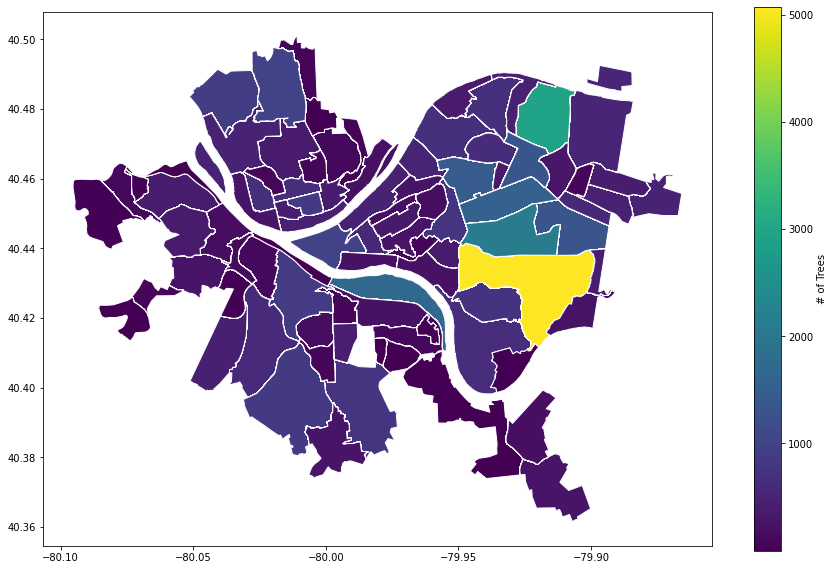

In [5]:
# Pittsburgh Trees data analyzed by: Brian Hutton

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

# Read in tree data file from WPRDC
trees_dataset = pd.read_csv("pittsburgh_trees.csv", low_memory=False)
trees_dataset = trees_dataset.reset_index()

# Get list of neighborhoods in dataset
neighborhood_names = trees_dataset['neighborhood'].unique()

# Figure out the counts for number of trees per neighborhood
trees_per_neighborhood = trees_dataset['neighborhood'].value_counts().to_dict()

# create new column in dataframe and for each row in dataframe add tree count for that neighborhood
trees_dataset['counts'] = 0
for index, row in trees_dataset.iterrows():
    trees_dataset.at[index, 'counts'] = trees_per_neighborhood.get(row['neighborhood'])
    
#display(HTML("<p>There are {} unique neighborhoods in this dataset.</p>".format(len(neighborhood_names))))

# form a string that resembles an html unordered list, then render that string to the document
# neighborhood_html_string = "<ul>"
# for neighborhood in neighborhood_names:
#    neighborhood_html_string += "<li>"
#    neighborhood_html_string += str(neighborhood)
#    neighborhood_html_string += "</li>"
#neighborhood_html_string += "</ul>"
#display(HTML(neighborhood_html_string))

# read in the shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# map plotting with geopandas
trees_map = neighborhoods.merge(trees_dataset, how='left', left_on='hood', right_on='neighborhood')
#trees_plot = 
trees_map.plot(column='counts', edgecolor="white", legend=True, legend_kwds={'label': "# of Trees"}, figsize=(15, 10))
#trees_plot.set_axis_off();